### discrete multivariate joint/marginal/conditional probability distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Setting seaborn style

#### Import ./modules/nb35.py

In [2]:
import nb35

##### generate a dataset

In [3]:
# draw sample of size N
data = nb35.dataset_1(N = 100)
data.head()

,C0,C1,C2,D0,D1,D2
0,0.337002,0.396483,0.266515,E,C,A
1,0.600735,0.199586,0.199679,E,C,A
2,0.769906,0.169496,0.060598,E,D,A
3,0.551509,0.292761,0.155730,E,C,B
4,0.607631,0.277797,0.114573,D,C,B


##### compute the contingency table

In [4]:
X, Y = data['D0'], data['D1']
ct = nb35.ContingencyTable2D(X, Y)
ct.counts

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  2.],
       [ 0.,  1.,  1.,  5.,  2.,  2.,  0.],
       [ 0.,  0.,  6.,  4.,  3.,  1.,  0.],
       [ 1.,  9., 19.,  8.,  1.,  0.,  0.],
       [ 0.,  4., 19.,  4.,  0.,  0.,  0.],
       [ 0.,  5.,  2.,  0.,  0.,  0.,  0.]])

In [5]:
ct.n, ct.cardX, ct.cardY

(100.0, 6, 7)

### Joint  distributions

The ***joint distribution*** of multiple variables is a probability distribution that describes the likelihood of different combinations of values for those variables occurring simultaneously. In simpler terms, it provides information about the probabilities associated with specific outcomes for all the variables considered together.

Let's consider two random variables, $X$ and $Y$. The joint distribution of $X$ and $Y$, denoted as $P(X, Y)$ or $f(x, y)$, provides the probabilities associated with each possible pair of values $(x, y)$ that $X$ and $Y$ can take on. Mathematically, this joint probability is represented as:

$$P\left(X = x_i, Y = y_j\right)\; \text{or} \; P\left(x_i, y_j\right)$$

Here, $x_i$ and $y_j$ represent specific values that $X$ and $Y$ can assume, respectively.

Properties:

   1. *Non-negativity*: $P\left(X = x_i, Y = y_j\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. *Normalization*: $\sum_{i,j}P\left(X = x_i, Y = y_j\right) = 1$, meaning that the sum of probabilities for all possible combinations of values equals 1.

The concept can be extended to more than two variables. For three variables $\left(X, Y, Z\right)$, the joint distribution is denoted as $P\left(X, Y, Z\right)$ or $f\left(x, y, z\right)$, and it describes the probabilities of all possible combinations of values for $X$, $Y$, and $Z$ occurring simultaneously.

##### For two categorical variables the joint distribution is given by the normalized contingency table
- this is analogous to a multivariate histogram of proportions

In [6]:
# normalize
xy_joint = ct.counts /ct.n    
xy_joint, np.sum(xy_joint)

(array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02],
        [0.  , 0.01, 0.01, 0.05, 0.02, 0.02, 0.  ],
        [0.  , 0.  , 0.06, 0.04, 0.03, 0.01, 0.  ],
        [0.01, 0.09, 0.19, 0.08, 0.01, 0.  , 0.  ],
        [0.  , 0.04, 0.19, 0.04, 0.  , 0.  , 0.  ],
        [0.  , 0.05, 0.02, 0.  , 0.  , 0.  , 0.  ]]),
 1.0)

##### Visualization of the joint distribution using a 2d histogram

In [7]:
#fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
#axs.hist2d(pd.factorize(data['D1'])[0], pd.factorize(data['D0'])[0], bins = [ct.cardY, ct.cardX], cmap = plt.cm.Blues, density = False, alpha = 0.8)

### Marginal  distributions

The ***marginal distributions*** provide the probabilities of each individual variable without considering the others. Mathematically, the marginal probabilities are represented as:

$$P\left(X = x_i\right),\; \forall x_{i}\in X;\quad P\left(Y = y_j\right),\; \forall y_{i}\in Y$$

Properties:

   1. *Non-negativity*: $\quad P\left(X = x_i\right) \geq 0, \quad \forall \left(x_i\right)$
  
   2. *Normalization*: $\quad \sum_{i}P\left(X = x_i\right) = 1$.

##### The *marginal* distributions are given by the normalized marginal counts in the contingency table
- this is analogous to the histogram of proportions for each individual variable

In [8]:
# marginal counts
ct.mrgX(), ct.mrgY()

(array([ 3., 11., 14., 38., 27.,  7.]),
 array([ 1., 19., 47., 21.,  7.,  3.,  2.]))

In [9]:
# marginal density of X
ct.mrgX() /ct.n, np.sum(ct.mrgX() /ct.n)

(array([0.03, 0.11, 0.14, 0.38, 0.27, 0.07]), 1.0)

In [10]:
# marginal density of Y
print('+++ the marginal distriution P(Y) is: %s' %np.round(ct.mrgY() /ct.n, 2))
print('+++ the marginal distribution adds up to: %d' %np.sum(ct.mrgY() /ct.n))

+++ the marginal distriution P(Y) is: [0.01 0.19 0.47 0.21 0.07 0.03 0.02]
+++ the marginal distribution adds up to: 1


##### Visualization of the joint and marginal distributions using seaborn
- seaborn.jointplot() depicts the marginal distributions as *proportion histograms* at the corresponding axes.

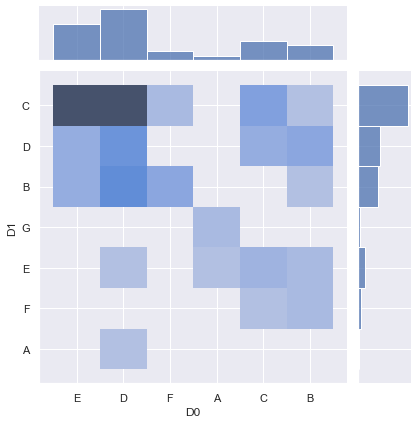

In [11]:
sns.jointplot(data = data, x = 'D0', y = 'D1', kind = 'hist', bins = [ct.cardX, ct.cardY]);

### Conditional distributions

A conditional distribution is a probability distribution that describes the probability of one or more random variables given the knowledge of the values of one or more other variables.

For the simplest case of two random variables, the conditional distribution of $Y$ given $X$, denoted as $P\left(Y | X\right)$ or $f\left(y | x\right)$, represents the probability distribution of $Y$ when the value of $X$ is known to be $x$. 

Properties:

   1. *Non-negativity*: $P\left(Y = y_j| X = x_i\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. *Normalization*: $\sum_{j}P\left(Y = y_j| X = x_i\right) = 1$.

This can be extended to the conditional distribution of more than two variables. For example, the conditional distribution of X given Y and Z is denoted as \( P(X | Y, Z) \) or \( f(x | y, z) \).

##### For two categorical variables the conditional distribution is given by the normalized rows/columns of the contingency table
- this is analogous to a histogram of proportions for a given class

In [12]:
# e.g. P(Y | X = 1)
y_x1 = ct.counts[1, :] /np.sum(ct.counts[1, :])
print('+++ the conditional distriution P(Y|X=4) is: %s' %np.round(y_x1, 2))
print('+++ the conditional distribution adds up to: %d' %np.sum(y_x1))

+++ the conditional distriution P(Y|X=4) is: [0.   0.09 0.09 0.45 0.18 0.18 0.  ]
+++ the conditional distribution adds up to: 1


##### The conditional distribution completes the relation between the join and the marginal distributions:

$$P\left(X, Y\right) = P\left(X\right)\;P\left(Y|X\right) = P\left(Y\right)\;P\left(X|Y\right)$$